# What is TF-IDF?
* TF stands for Term Frequency and denotes the ratio of number of times a particular word appeared in a Document to total number of words in the document.

   Term Frequency(TF) = [number of times word appeared / total no of words in a document]
* Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.

* IDF stands for Inverse Document Frequency and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

   Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]
* In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.

* Finally:

   TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)


# Step 1: Term Frequency (TF)

In [9]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = [
    "I love natural language processing.",
    "Natural language processing is fun.",
    "I enjoy learning about data science."
]

# Initialize CountVectorizer to count word frequencies
count_vectorizer = CountVectorizer()

# Fit and transform the documents to get the word counts (TF)
tf_matrix = count_vectorizer.fit_transform(documents)

# Convert the TF matrix to a pandas DataFrame for better readability
tf_array = tf_matrix.toarray()
tf_dataframe = pd.DataFrame(tf_array, columns=count_vectorizer.get_feature_names_out())

# Display the Term Frequency (TF) matrix
print("Term Frequency (TF) Matrix:\n", tf_dataframe)


Term Frequency (TF) Matrix:
    about  data  enjoy  fun  is  language  learning  love  natural  processing  \
0      0     0      0    0   0         1         0     1        1           1   
1      0     0      0    1   1         1         0     0        1           1   
2      1     1      1    0   0         0         1     0        0           0   

   science  
0        0  
1        0  
2        1  


In [18]:
#let's print the vocabulary

print(count_vectorizer.vocabulary_)

{'love': 7, 'natural': 8, 'language': 5, 'processing': 9, 'is': 4, 'fun': 3, 'enjoy': 2, 'learning': 6, 'about': 0, 'data': 1, 'science': 10}


# Inverse Document Frequency (IDF)

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

# Initialize the TfidfTransformer to calculate IDF
tfidf_transformer = TfidfTransformer(use_idf=True)

# Fit the TF matrix to compute the IDF values
tfidf_transformer.fit(tf_matrix)

# Get the IDF values
idf_values = tfidf_transformer.idf_
idf_dataframe = pd.DataFrame(idf_values, index=count_vectorizer.get_feature_names_out(), columns=["IDF"])

# Display the IDF values
print("Inverse Document Frequency (IDF) Values:\n", idf_dataframe)


Inverse Document Frequency (IDF) Values:
                  IDF
about       1.693147
data        1.693147
enjoy       1.693147
fun         1.693147
is          1.693147
language    1.287682
learning    1.693147
love        1.693147
natural     1.287682
processing  1.287682
science     1.693147


#  TF-IDF Calculation

In [11]:
# Transform the original TF matrix using the TF-IDF transformer
tfidf_matrix = tfidf_transformer.transform(tf_matrix)

# Convert the TF-IDF matrix to a pandas DataFrame
tfidf_array = tfidf_matrix.toarray()
tfidf_dataframe = pd.DataFrame(tfidf_array, columns=count_vectorizer.get_feature_names_out())

# Display the TF-IDF matrix
print("TF-IDF Matrix:\n", tfidf_dataframe)


TF-IDF Matrix:
       about      data     enjoy      fun       is  language  learning  \
0  0.000000  0.000000  0.000000  0.00000  0.00000  0.459854  0.000000   
1  0.000000  0.000000  0.000000  0.51742  0.51742  0.393511  0.000000   
2  0.447214  0.447214  0.447214  0.00000  0.00000  0.000000  0.447214   

       love   natural  processing   science  
0  0.604652  0.459854    0.459854  0.000000  
1  0.000000  0.393511    0.393511  0.000000  
2  0.000000  0.000000    0.000000  0.447214  


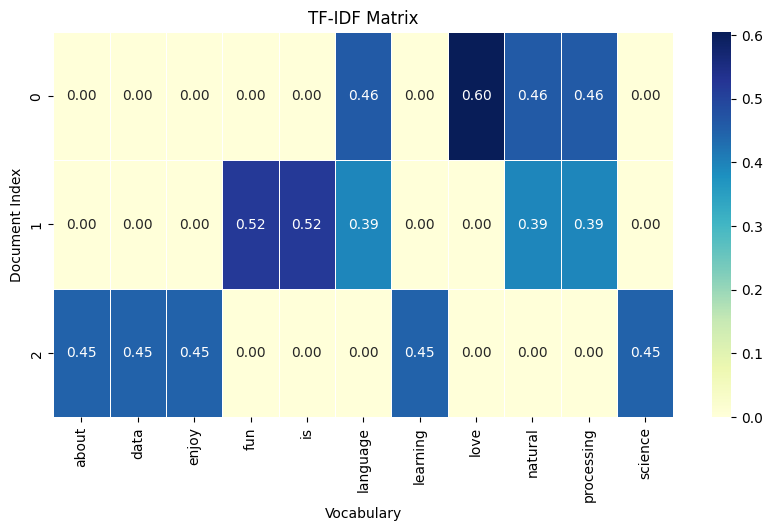

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = [
    "I love natural language processing.",
    "Natural language processing is fun.",
    "I enjoy learning about data science."
]

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Convert to array for better visualization
tfidf_array = tfidf_matrix.toarray()

# Get the vocabulary
vocabulary = vectorizer.get_feature_names_out()

# Create a pandas DataFrame for the TF-IDF matrix
df = pd.DataFrame(tfidf_array, columns=vocabulary)

# Plot a heatmap using seaborn
plt.figure(figsize=(10, 5))
sns.heatmap(df, annot=True, cmap="YlGnBu", linewidths=0.5, fmt='.2f')

# Set title and labels
plt.title("TF-IDF Matrix")
plt.ylabel("Document Index")
plt.xlabel("Vocabulary")

# Show the plot
plt.show()


In [19]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
#let's create the vectorizer and fit the corpus and transform them accordingly
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [21]:
#let's print the vocabulary

print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [22]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    
    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)
    
    #get the score
    idf_score = v.idf_[indx]
    
    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [23]:
#let's print the transformed output from tf-idf
print(transform_output.toarray())

[[0.24266547 0.         0.         0.         0.         0.
  0.         0.24266547 0.         0.         0.40286636 0.
  0.         0.         0.         0.24266547 0.11527033 0.24266547
  0.         0.         0.         0.         0.72799642 0.
  0.         0.24266547 0.         0.        ]
 [0.         0.         0.         0.         0.30652086 0.5680354
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5680354  0.         0.26982671 0.
  0.         0.         0.30652086 0.         0.         0.
  0.         0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26982671 0.
  0.         0.5680354  0.30652086 0.         0.         0.
  0.5680354  0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample corpus
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

# Create the TfidfVectorizer and fit-transform the corpus
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(corpus)

# Print the vocabulary
print("Vocabulary:")
print(vectorizer.vocabulary_)

# Get feature names (words)
all_feature_names = vectorizer.get_feature_names_out()

# Print the IDF score for each word in the vocabulary
print("\nIDF Scores:")
for word in all_feature_names:
    # Get the index of the word in the vocabulary
    index = vectorizer.vocabulary_.get(word)
    
    # Get the IDF score of the word
    idf_score = vectorizer.idf_[index]
    
    print(f"{word} : {idf_score}")

# To view the TF-IDF matrix, we can print it as a dense array:
print("\nTF-IDF Matrix:")
print(X_tfidf.toarray())


Vocabulary:
{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}

IDF Scores:
already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.38